In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
from funz import *

# LA CELLA SEGUENTE È L'UNICA CHE CAMBIA TRA I DUE NOTEBOOK

In [2]:
#Cartella risultati
cart="Risultati_"
tipo="pioggia"
outdir=cart+tipo+"/"
print("La cartella di salvataggio dei risultati è: "+outdir)
#Quota neve
Zneve=None #non presente

La cartella di salvataggio dei risultati è: Risultati_pioggia/


# Caricamento dati

## Lettura CSV

In [3]:
# Nome file
file_VolInv="CurvaVolumeInvaso.csv"
file_IpsMet="CurvaIpsometrica.csv"
file_Precip="CurvaPrecipitazioniCumulate.csv"
file_Dati="DatiBacinoIniziali.csv"
# Apertura in un dataframe
df_VolInv=pd.read_csv(file_VolInv, sep =";")
df_IpsMet=pd.read_csv(file_IpsMet, sep =";")
df_Precip=pd.read_csv(file_Precip, sep =";")
df_Dati=pd.read_csv(file_Dati, sep =";")

In [4]:
df_VolInv

,Quota [m s.l.m.],Volume totale [Mm^3]
0,830,40
1,825,27
2,820,17
3,815,9
4,810,4
5,805,1
6,800,0


In [5]:
df_IpsMet

,Quota [m s.l.m.],Area cumulata [%]
0,800,0
1,1000,5
2,1200,15
3,1400,30
4,1600,50
5,1800,70
6,2000,85
7,2200,95
8,2400,100


In [6]:
df_Precip

,Tempo [h],Precipitazioni cumulate [mm]
0,0,0
1,1,5
2,2,10
3,3,15
4,4,20
5,5,25
6,6,30
7,7,35
8,8,40
9,9,45


In [7]:
df_Dati

,Area totale [km^2],Capacità massima [Mm^3],Quota di sfioro [m s.l.m.],Portata massima turbinabile [m^3/s],DMV [m^3/s],Quota iniziale [m s.l.m.],Portata turbinata [m^3/s],Inizio turbinata [h],Fine turbinata [h],Tempo proiezione [h]
0,200,40,830,16,1.5,823,12,10,18,72


## Vettori numpy con i dati di partenza del problema

In [8]:
nm_H=df_VolInv.columns[0]
H=df_VolInv.iloc[:,0].to_numpy(dtype='float32') #Quota invaso
nm_V=df_VolInv.columns[1]
V=df_VolInv.iloc[:,1].to_numpy(dtype='float32') #Volume totale acqua invasata

In [9]:
nm_Tp=df_Precip.columns[0] 
Tp=df_Precip.iloc[:,0].to_numpy(dtype='float32') #Tempo [h]
nm_Pcum=df_Precip.columns[1]
Pcum=df_Precip.iloc[:,1].to_numpy(dtype='float32') #Precipitazioni cumulate 

In [10]:
nm_Z=df_IpsMet.columns[0]
Z=df_IpsMet.iloc[:,0].to_numpy(dtype='float32') #Quota 
nm_Arel=df_IpsMet.columns[1]
Arel=df_IpsMet.iloc[:,1].to_numpy(dtype='float32') #Area relativa

In [11]:
nm_Atot=df_Dati.columns[0]
Atot=df_Dati[nm_Atot].to_numpy()*1e+6 #Area totale bacino
print(nm_Atot,Atot)
nm_Vmax=df_Dati.columns[1]
Vmax=df_Dati[nm_Vmax].to_numpy() #Capacità massima
print(nm_Vmax,Vmax)
nm_Hmax=df_Dati.columns[2]
Hmax=df_Dati[nm_Hmax].to_numpy() #Quota massima bacino
print(nm_Hmax,Hmax)
nm_TBmax=df_Dati.columns[3]
TBmax=df_Dati[nm_TBmax].to_numpy() #Portata max turbina
print(nm_TBmax,TBmax)
nm_DMV=df_Dati.columns[4]
DMV=df_Dati[nm_DMV].to_numpy() #Portata DMV
print(nm_DMV,DMV)
nm_H0=df_Dati.columns[5]
H0=df_Dati[nm_H0].to_numpy() #Quota iniziale bacino
print(nm_H0,H0)
nm_TBieri=df_Dati.columns[6] 
TBieri=df_Dati[nm_TBieri].to_numpy() #Portata turbinata
print(nm_TBieri,TBieri)
nm_inizio=df_Dati.columns[7]
inizio=df_Dati[nm_inizio].to_numpy() #Inizio turbinata
print(nm_inizio,inizio)
nm_fine=df_Dati.columns[8]
fine=df_Dati[nm_fine].to_numpy() #Fine turbinata
print(nm_fine,fine)
nm_Ttot=df_Dati.columns[9]
Ttot=df_Dati[nm_Ttot].to_numpy() #Tempo proiezione
print(nm_Ttot,Ttot)
deltaT=600 #passo di campionamento in secondi (10 minuti)
T=np.arange(0,Ttot,deltaT/3600)

Area totale [km^2] [2.e+08]
Capacità massima [Mm^3] [40]
Quota di sfioro [m s.l.m.] [830]
Portata massima turbinabile [m^3/s] [16]
DMV [m^3/s] [1.5]
Quota iniziale [m s.l.m.] [823]
Portata turbinata [m^3/s] [12]
Inizio turbinata [h] [10]
Fine turbinata [h] [18]
Tempo proiezione [h] [72]


## Volume iniziale

In [12]:
V0=valInt(H,V,H0)
print(f"Il volume d'acqua iniziale dell'invaso è: {float(V0)} m^3")
print(f"Il volume d'acqua mancante per riempire l'invaso è: {float(Vmax-V0)} m^3")

Il volume d'acqua iniziale dell'invaso è: 23.0 m^3
Il volume d'acqua mancante per riempire l'invaso è: 17.0 m^3


## Considerazione: Nel bacino precipitano 24 Mm^3 in un giorno e il volume rimanete è di 17 Mm^3... C'è possibilità di sfioro.

# Scelgo idrogramma di piena
Nel caso in cui non sia presente un idrogramma di piena tra i file .csv, lo ipotizzo partendo da una distribuzione Gamma. Ho impostato i parametri della distribuzione tenendo conto del fatto che l'area del bacino non è molto grande e quindi la maggior parte dell'acqua piovuta raggiunge l'invaso entro qualche ora.

Il volume è: 0.9999182594314329


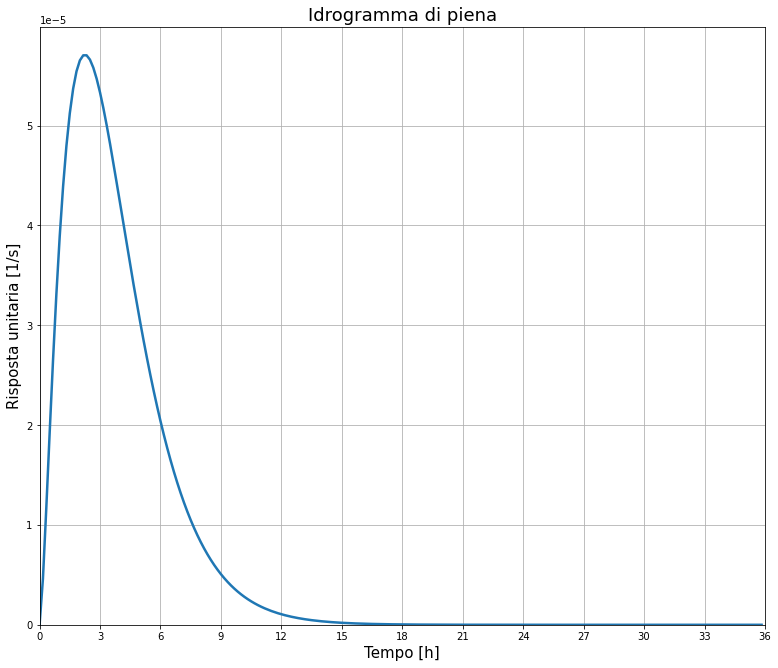

In [13]:
Trisp_max=36 #tempo di risposta massimo [h] 
file_IdrPiena="IdrogrammaPiena.csv"
try:
    df_IdrPiena=pd.read_csv(file_IdrPiena, sep =";")
    nm_Tip=df_IdrPiena.columns[0] 
    Tip=df_IdrPiena.iloc[:,0].to_numpy(dtype='float32') #Tempo [h]
    nm_U=df_IdrPiena.columns[1]
    U=df_IdrPiena[:,1].to_numpy(dtype='float32') #Risposta unitaria
except:
    Tip=np.arange(0,Trisp_max,deltaT/3600)
    a=2.5 #Parametro distribuzione
    U=ss.gamma.pdf(Tip, a,loc=0, scale=1.5)/3600
    #Controllo che il volume totale sia 1
    Vu=U.sum()*deltaT
    print(f"Il volume è: {Vu}")
    #Grafico
    fig, ax = plt.subplots(figsize=(13, 11))
    ax.plot(Tip,U,linewidth=2.5,label='gamma pdf')
    ax.set_ylabel("Risposta unitaria [1/s]",fontsize=15)
    ax.set_xlabel("Tempo [h]",fontsize=15)
    ax.set_xticks(np.arange(0, Trisp_max+1, step=3))
    ax.set_title("Idrogramma di piena",fontsize=18)
    ax.set_xlim(0,Trisp_max)
    ax.set_ylim(bottom=0)
    ax.grid()
    fig.savefig(outdir+"IdrogrammaPiena.png",facecolor='white')


# Determino tasso di ruscellamento a partire dalle precipitazioni cumulate
## Fisso i coefficienti di ruscellamento

In [14]:
#Parametri ipotizzati
Apioggia=0.9
Aneve=0.
Ztrans=500 #altezza transizione pioggia/neve

## Calcolo alfa medio e tasso di ruscellamento

In [15]:
Tprec,intP,R,Amedio,V_in=R_calc(Tp,Pcum,deltaT,Z,Atot,Arel,Apioggia,Aneve,Zneve,Ztrans)
print(f"Il coefficiente medio di ruscellamento è: {Amedio*100}%")
print(f"Il volume totale di acqua che ha ruscellato è: {V_in:.2e} m^3")

Il coefficiente medio di ruscellamento è: 90.0%
Il volume totale di acqua che ha ruscellato è: 2.16e+07 m^3


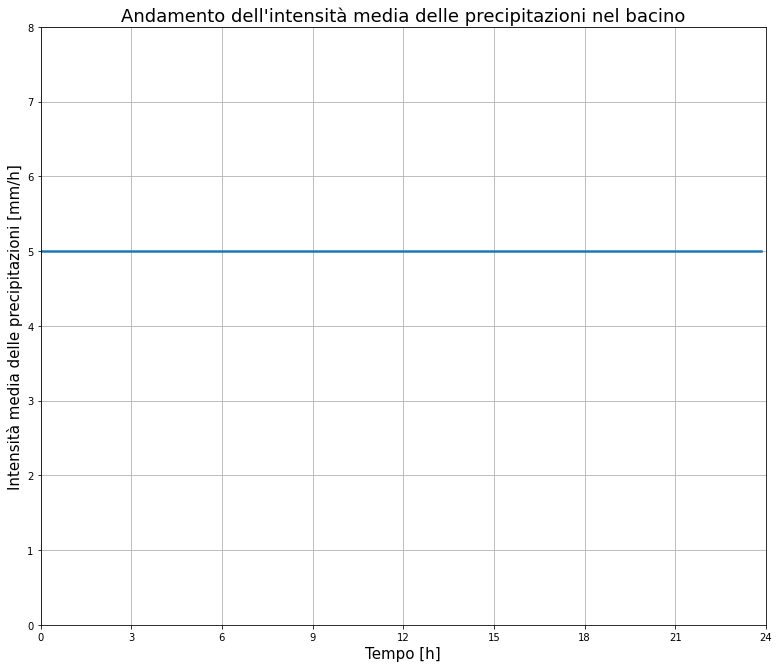

In [16]:
fig, ax = plt.subplots(figsize=(13, 11))
ax.plot(Tprec[:-1],intP*3600,linewidth=2.5,label='gamma pdf')
ax.set_ylabel("Intensità media delle precipitazioni [mm/h]",fontsize=15)
ax.set_xlabel(nm_Tp,fontsize=15)
ax.set_xticks(np.arange(0, Tprec[-1]+1, step=3))
ax.set_title("Andamento dell'intensità media delle precipitazioni nel bacino",fontsize=18)
ax.set_xlim(0,Tprec[-1])
ax.set_ylim(bottom=0, top=8)
ax.grid()
fig.savefig(outdir+"Precipitazioni.png",facecolor='white')

# Determino portata entrante nell'invaso
Convoluzione tra idrogramma di piena unitario e tasso di ruscellamento

In [17]:
Q=np.convolve(R,U)*deltaT #[m^3/s]
lenQ=len(Q)
lenT=len(T)
if lenQ<lenT:
    Qe=np.zeros(lenT) #completo con zeri finali fino al termine della proiezione
    Qe[:lenQ]=Q
else: 
    Qe=Q[:lenT] #tronco il vettore al termine della proiezione

## Controllo che V_in sia uguale a V_e

In [18]:
V_e=Q.sum()*deltaT
print(f"Il volume totale di acqua entrante nell'invaso è: {V_in:.2e} m^3")

Il volume totale di acqua entrante nell'invaso è: 2.16e+07 m^3


# Determino volume e quota, plotto e salvo i risultati

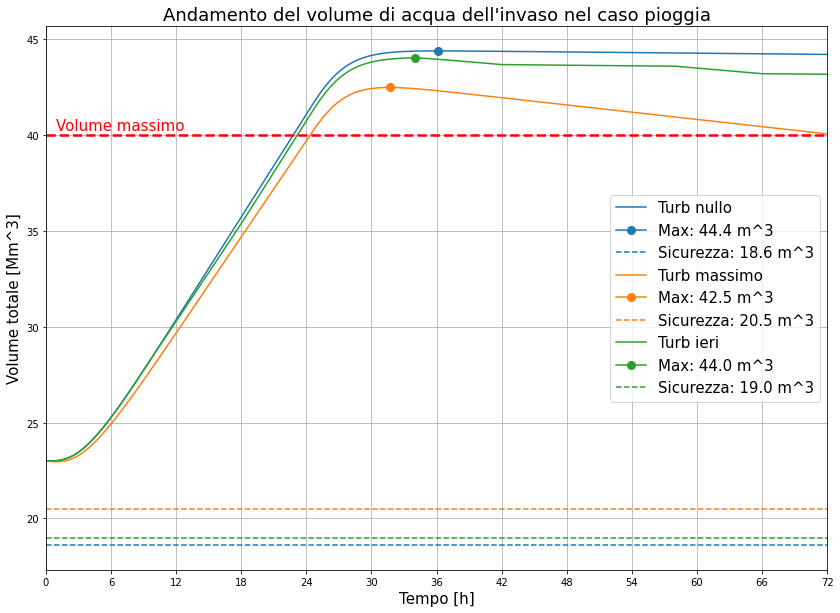

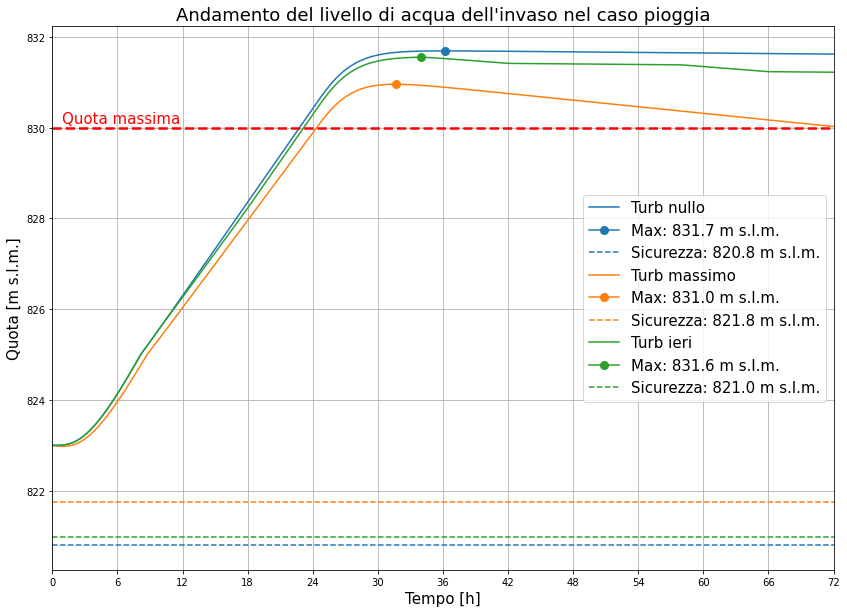

In [19]:
T=np.append(T,Ttot) #aggiungo ultimo valore per plot
Qieri=TB_vett(inizio,fine,deltaT,lenT)*TBieri #Portata uscente se si turbina come il giorno precedente
# Strategie di produzione
QT=[0,TBmax,Qieri] #portata turbinata
lg=["Turb nullo","Turb massimo","Turb ieri"]
Tmode=["T0","Tmax","Tieri"]
c=["C0","C1","C2"] #colori
# Creazione grafici
figV, axV = plt.subplots(figsize=(14, 10))
axV.set_title("Andamento del volume di acqua dell'invaso nel caso "+tipo,fontsize=18)
figH, axH = plt.subplots(figsize=(14, 10))
axH.set_title("Andamento del livello di acqua dell'invaso nel caso "+tipo,fontsize=18)
dizOrario={nm_Tp:T[0::6].astype('int')}
diz={}
for n,qt in enumerate(QT): #ciclo su ogni strategia di produzione
    Qu=qt+DMV #portata uscente [m^3/s]
    Qnetto=Qe-Qu #portata netta [m^3/s]
    deltaV=Qnetto*deltaT*1e-6 #variazione di volume [Mm^3]
    Vf=V0+np.cumsum(deltaV)
    V_invaso=np.concatenate((V0,Vf)) #Volume invaso [Mm^3]
    VM=V_invaso.max() #Massimo volume raggiunto
    HM=valInt(V,H,[VM]) #Massimo livello raggiunto
    idxmax=V_invaso.argmax() #Posizione massimo
    TM=T[idxmax]
    Vecc=VM-Vmax #Volume eccedente
    H_invaso=valInt(V,H,V_invaso) #Quota [m s.l.m.]
    #Plot volume
    axV.plot(T,V_invaso,color=c[n],label=lg[n])
    axV.plot(TM,VM,color=c[n],label=f"Max: {float(VM):.1f} m^3",marker='o',markersize=8)
    #Plot quota
    axH.plot(T,H_invaso,color=c[n],label=lg[n])
    axH.plot(TM,HM,color=c[n],label=f"Max: {float(HM):.1f} m s.l.m.",marker='o',markersize=8)
    #Salvo in un dizionario le serie orarie ottenute
    dizOrario.update({Tmode[n]+"_"+nm_H:H_invaso[0::6].round(1),Tmode[n]+"_"+nm_V:V_invaso[0::6].round(1)})
    #Calcolo livello di sicurezza
    if Vecc>0:
        V0_sicuro=V0-Vecc
        V_sicuro=V-Vecc
        H0_sicuro=valInt(V,H,V0_sicuro)
        H_sicuro=valInt(V,H,V_sicuro)
        axV.axhline(V0_sicuro,linestyle='--',color=c[n],label=f"Sicurezza: {float(V0_sicuro):.1f} m^3",linewidth=1.5)
        axH.axhline(H0_sicuro,linestyle='--',color=c[n],label=f"Sicurezza: {float(H0_sicuro):.1f} m s.l.m.",linewidth=1.5)
        diz.update({Tmode[n]+"_Quota sicurezza [m s.l.m.]":H0_sicuro.round(1),Tmode[n]+"_Volume massimo [m^3]":VM.round(1)})
    else:
        V0_sicuro=None
        H0_sicuro=None
        diz.update({Tmode[n]+"_Quota sicurezza [m s.l.m.]":H0_sicuro,Tmode[n]+"_Volume massimo [m^3]":VM.round(1)})
        
# Ritocco e salvataggio grafici
plotting(axV,Vmax,0,Ttot,nm_Tp,nm_V,"Volume massimo")
figV.savefig(outdir+"VolumeInvaso_"+tipo+".png",facecolor='white')
plotting(axH,Hmax,0,Ttot,nm_Tp,nm_H,"Quota massima")
figH.savefig(outdir+"QuotaInvaso_"+tipo+".png",facecolor='white')

# Visualizzo in un dataframe i risultati finali e salvo in due csv

In [20]:
#Serie orarie
df_risOrario=pd.DataFrame(dizOrario)
df_risOrario

,Tempo [h],T0_Quota [m s.l.m.],T0_Volume totale [Mm^3],Tmax_Quota [m s.l.m.],Tmax_Volume totale [Mm^3],Tieri_Quota [m s.l.m.],Tieri_Volume totale [Mm^3]
0,0,823.0,23.0,823.0,23.0,823.0,23.0
1,1,823.0,23.0,823.0,23.0,823.0,23.0
2,2,823.1,23.1,823.0,23.0,823.1,23.1
3,3,823.2,23.5,823.1,23.3,823.2,23.5
4,4,823.5,23.9,823.4,23.7,823.5,23.9
...,...,...,...,...,...,...,...
68,68,831.6,44.2,830.1,40.3,831.2,43.2
69,69,831.6,44.2,830.1,40.3,831.2,43.2
70,70,831.6,44.2,830.1,40.2,831.2,43.2
71,71,831.6,44.2,830.0,40.1,831.2,43.2


In [21]:
#Dati finali
df_risultati=pd.DataFrame(diz,index=[0])
df_risultati

,T0_Quota sicurezza [m s.l.m.],T0_Volume massimo [m^3],Tmax_Quota sicurezza [m s.l.m.],Tmax_Volume massimo [m^3],Tieri_Quota sicurezza [m s.l.m.],Tieri_Volume massimo [m^3]
0,820.8,44.4,821.8,42.5,821.0,44.0


In [22]:
df_risOrario.to_csv(outdir+"SerieOrarie_"+tipo+".csv",sep=';',index=False)
df_risultati.to_csv(outdir+"DatiFinali_"+tipo+".csv",sep=';',index=False)